<a href="https://colab.research.google.com/github/GundamYeti/MSDS462_Winter2020/blob/master/Matt_Cherry_Computer_Vision_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras import models
from keras import layers
from tensorflow import keras

import time

import matplotlib.pyplot as plt

In [0]:
from keras.datasets import fashion_mnist
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

In [18]:
trainX.shape

(60000, 28, 28)

In [21]:
len(trainX)

60000

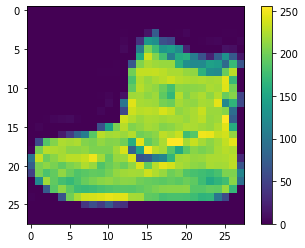

In [23]:
plt.figure()
plt.imshow(trainX[0])
plt.colorbar()
plt.grid(False)
plt.show()

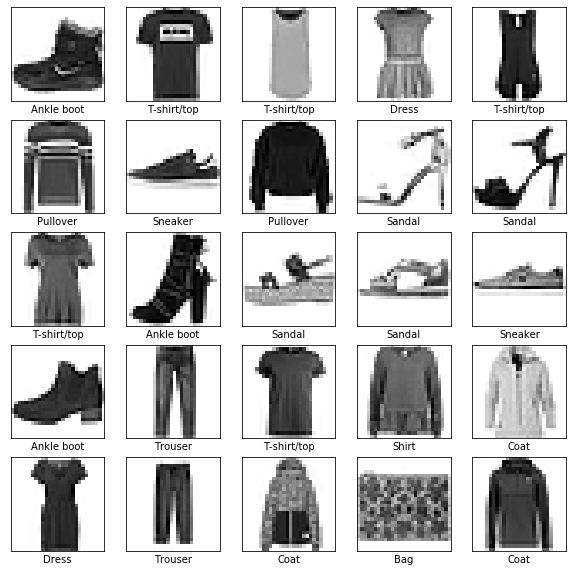

In [27]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainY[i]])
plt.show()

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 1s 17us/sample - loss: 250.2174 - acc: 0.0169 - val_loss: 320.3518 - val_acc: 0.1088
Epoch 2/20
48000/48000 [==============================] - 0s 10us/sample - loss: 318.2608 - acc: 0.1080 - val_loss: 217.8136 - val_acc: 0.2205
Epoch 3/20
48000/48000 [==============================] - 0s 10us/sample - loss: 220.0776 - acc: 0.2201 - val_loss: 165.8293 - val_acc: 0.2997
Epoch 4/20
48000/48000 [==============================] - 0s 10us/sample - loss: 167.3917 - acc: 0.2945 - val_loss: 112.3342 - val_acc: 0.3094
Epoch 5/20
48000/48000 [==============================] - 0s 10us/sample - loss: 111.2931 - acc: 0.3076 - val_loss: 81.1875 - val_acc: 0.4377
Epoch 6/20
48000/48000 [==============================] - 0s 10us/sample - loss: 82.3899 - acc: 0.4316 - val_loss: 46.6569 - val_acc: 0.5449
Epoch 7/20
48000/48000 [==============================] - 0s 10us/sample - loss: 47.4900 - acc:

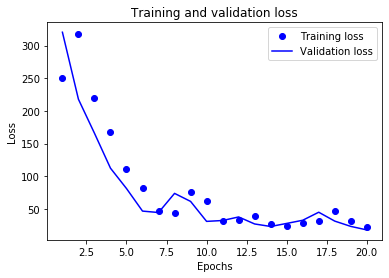

In [35]:
# Model 1

tic = time.clock()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(trainX,
                    trainY,
                    epochs=20,
                    batch_size=60000,
                    validation_split=0.2)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

toc = time.clock()

ttime = toc - tic

print("Time in seconds: %f" %ttime)

model.summary()

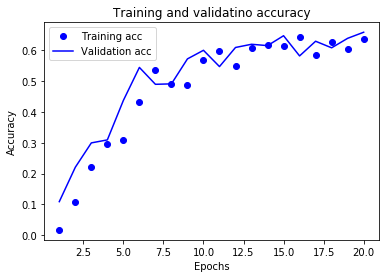

In [36]:
# Model 1

plt.clf()
acc=history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 1s 27us/sample - loss: 9.7322 - acc: 0.1033 - val_loss: 4.2394 - val_acc: 0.1637
Epoch 2/20
48000/48000 [==============================] - 1s 22us/sample - loss: 4.2479 - acc: 0.1619 - val_loss: 5.6327 - val_acc: 0.2190
Epoch 3/20
48000/48000 [==============================] - 1s 21us/sample - loss: 5.6408 - acc: 0.2168 - val_loss: 3.7527 - val_acc: 0.1832
Epoch 4/20
48000/48000 [==============================] - 1s 21us/sample - loss: 3.7365 - acc: 0.1817 - val_loss: 3.6353 - val_acc: 0.1864
Epoch 5/20
48000/48000 [==============================] - 1s 21us/sample - loss: 3.6332 - acc: 0.1848 - val_loss: 4.0073 - val_acc: 0.1850
Epoch 6/20
48000/48000 [==============================] - 1s 22us/sample - loss: 4.0043 - acc: 0.1833 - val_loss: 3.6505 - val_acc: 0.1630
Epoch 7/20
48000/48000 [==============================] - 1s 22us/sample - loss: 3.6468 - acc: 0.1604 - val_loss: 3.

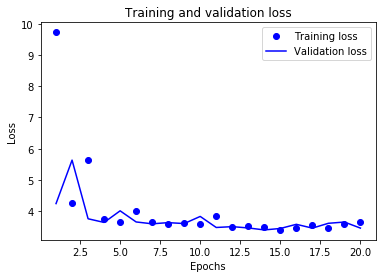

In [37]:
# Model 2

tic = time.clock()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='relu')
])

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(trainX,
                    trainY,
                    epochs=20,
                    batch_size=60000,
                    validation_split=0.2)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

toc = time.clock()

ttime = toc - tic

print("Time in seconds: %f" %ttime)

model.summary()

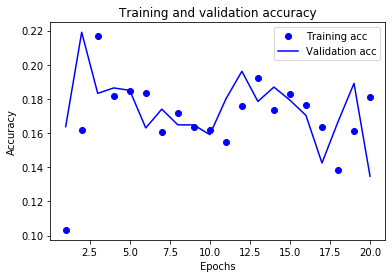

In [38]:
# Model 2

plt.clf()
acc=history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [64]:
# Model 3


#trainX_3 = np.expand_dims(trainX, 3)

trainX_3y = np.expand_dims(trainX, axis=1)

tic = time.clock()

model = keras.Sequential([
    #keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Conv2D(32,(1,1), padding="same", activation="relu",input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(trainX_3,
                    trainY,
                    epochs=20,
                    batch_size=60000,
                    validation_split=0.2)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

toc = time.clock()

ttime = toc - tic

print("Time in seconds: %f" %ttime)

model.summary()

ValueError: ignored

In [0]:
# Model 3

plt.clf()
acc=history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

numpy.ndarray

In [69]:

#trainX_3 = trainX[..., np.newaxis]

#trainX_3y = np.expand_dims(trainX, axis=1)

trainX_3 = np.concatenate((trainX, 1))

ValueError: ignored

In [63]:
trainX_3y.shape

(60000, 1, 28, 28)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 7s 153us/sample - loss: 2.3368 - acc: 0.0749 - val_loss: 2.2588 - val_acc: 0.1665
Epoch 2/20
48000/48000 [==============================] - 5s 95us/sample - loss: 2.2576 - acc: 0.1727 - val_loss: 2.2035 - val_acc: 0.2436
Epoch 3/20
48000/48000 [==============================] - 4s 91us/sample - loss: 2.2026 - acc: 0.2509 - val_loss: 2.1534 - val_acc: 0.3169
Epoch 4/20
48000/48000 [==============================] - 4s 93us/sample - loss: 2.1531 - acc: 0.3250 - val_loss: 2.1043 - val_acc: 0.3749
Epoch 5/20
48000/48000 [==============================] - 4s 91us/sample - loss: 2.1042 - acc: 0.3804 - val_loss: 2.0539 - val_acc: 0.4178
Epoch 6/20
48000/48000 [==============================] - 5s 95us/sample - loss: 2.0547 - acc: 0.4256 - val_loss: 2.0030 - val_acc: 0.4519
Epoch 7/20
48000/48000 [==============================] - 5s 94us/sample - loss: 2.0039 - acc: 0.4583 - val_loss: 1

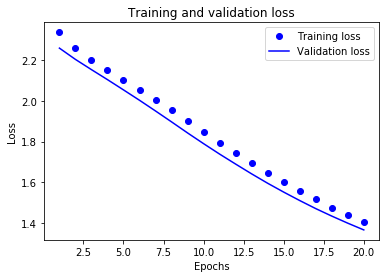

In [85]:
# Model 4

trainX_3 = trainX.astype(float)

tic = time.clock()

model = keras.Sequential([
    #keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.LSTM(32),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(trainX_3,
                    trainY,
                    epochs=20,
                    batch_size=60000,
                    validation_split=0.2)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

toc = time.clock()

ttime = toc - tic

print("Time in seconds: %f" %ttime)

model.summary()

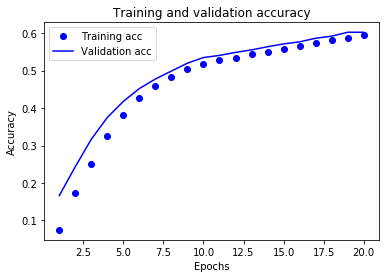

In [86]:
# Model 4

plt.clf()
acc=history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()